In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the data
data = pd.read_csv('data.csv')
data = data.drop(['Unnamed: 0'],axis = 1)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,ManU_stock,Lindsell_stock,Position,Points,Cumulative_points,Unexpected_points,Interest
Date,,,,,,,
2016-08-15,16.570000,783.5,1.0,3.0,3.0,1.080851,38.0
2016-08-16,16.440001,785.0,1.0,3.0,3.0,1.080851,38.0
2016-08-17,16.260000,785.0,1.0,3.0,3.0,1.080851,38.0
2016-08-18,16.580000,805.0,1.0,3.0,3.0,1.080851,38.0
2016-08-19,16.350000,819.0,1.0,3.0,6.0,0.852684,38.0
...,...,...,...,...,...,...,...
2024-05-13,16.030001,788.0,8.0,0.0,54.0,-0.433055,43.0
2024-05-14,16.129999,800.0,8.0,0.0,54.0,-0.433055,43.0
2024-05-15,16.850000,806.0,8.0,3.0,57.0,1.681051,43.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1953 entries, 2016-08-15 to 2024-05-17
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ManU_stock         1953 non-null   float64
 1   Lindsell_stock     1953 non-null   float64
 2   Position           1953 non-null   float64
 3   Points             1953 non-null   float64
 4   Cumulative_points  1953 non-null   float64
 5   Unexpected_points  1953 non-null   float64
 6   Interest           1953 non-null   float64
dtypes: float64(7)
memory usage: 122.1 KB


In [3]:
# convert to datetime, integer and float
data['Position'] = data['Position'].astype(int)
data['Points'] = data['Points'].astype(float)
data['Cumulative_points'] = data['Cumulative_points'].astype(float)
data['Interest'] = data['Interest'].astype(float)

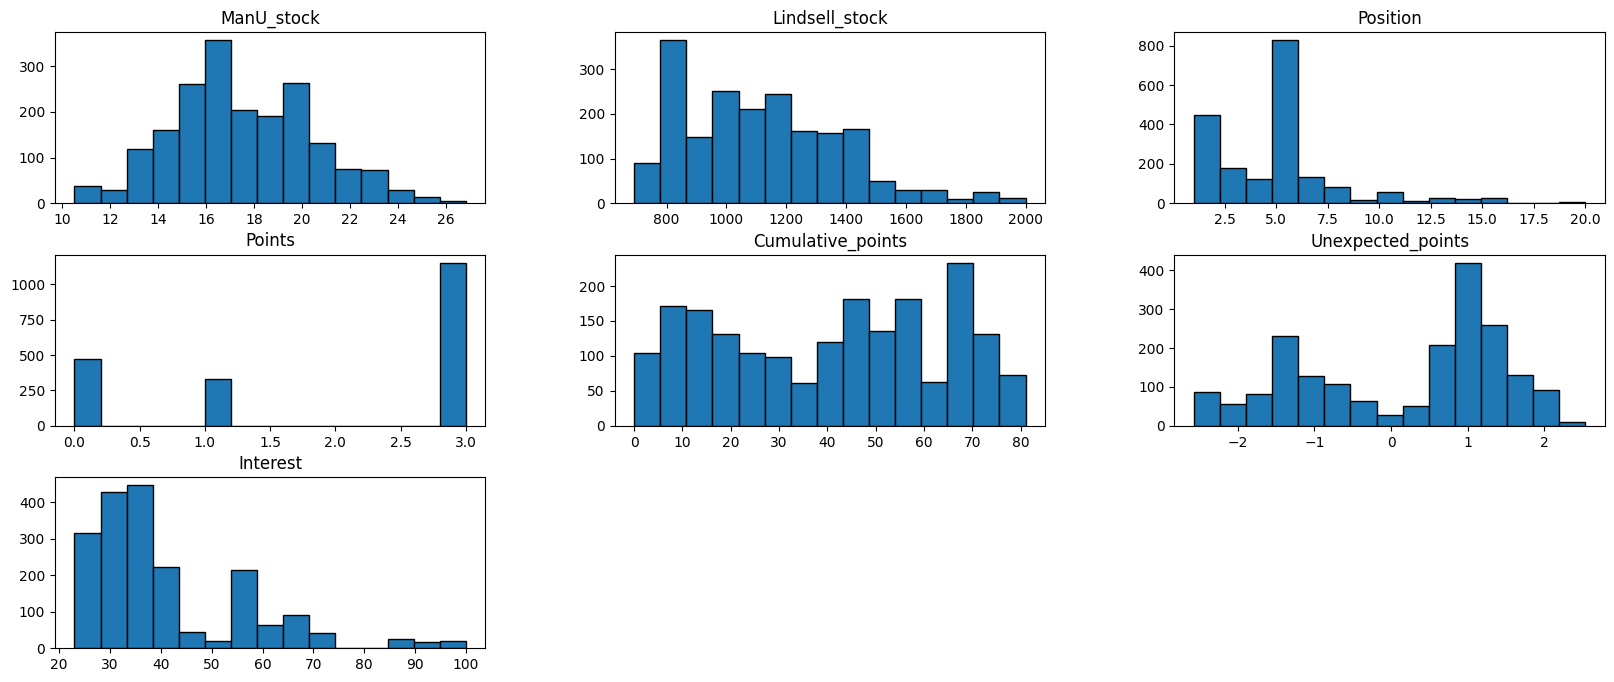

In [4]:
data.hist(bins=15, figsize=(20,8), grid=False, edgecolor='black')
plt.show()

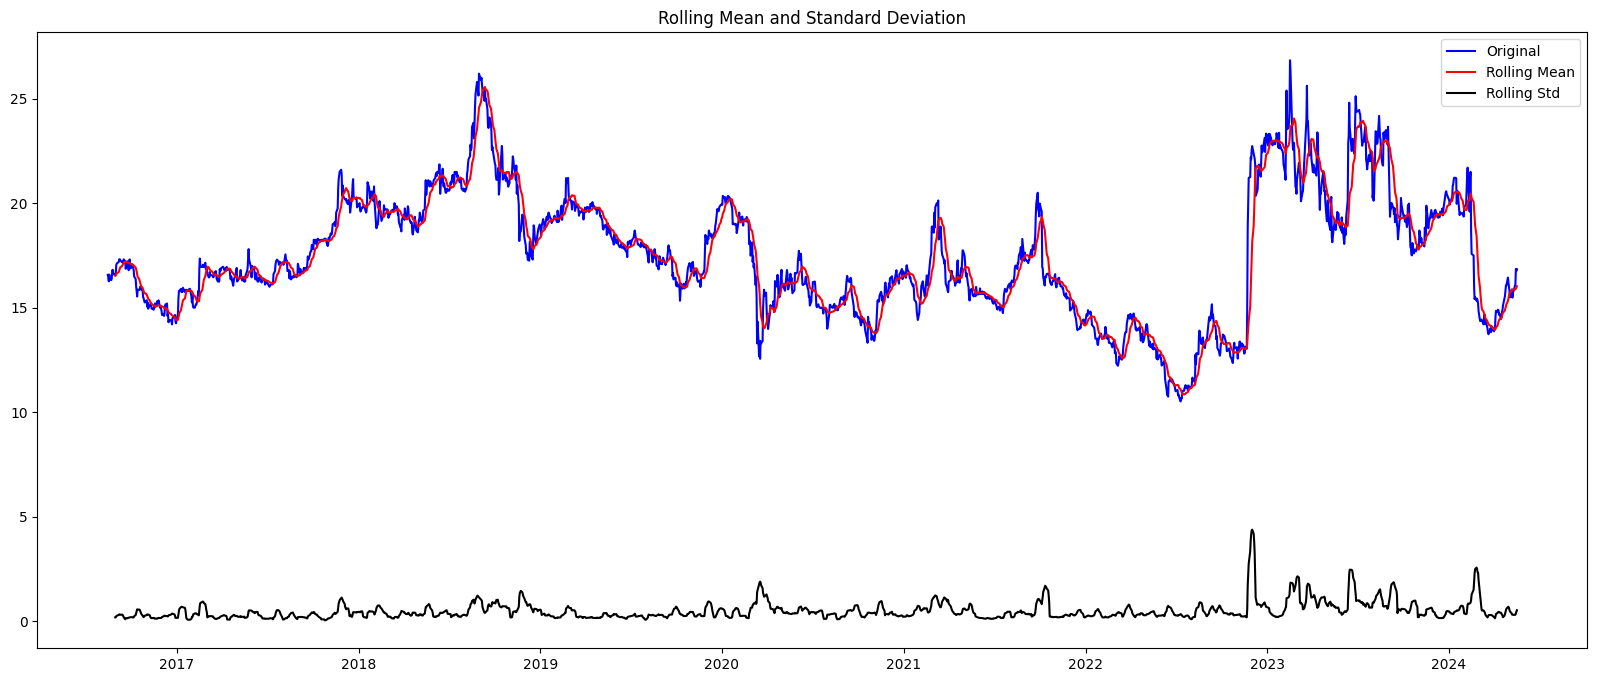

Results of Dickey-Fuller Test:
Test Statistic                   -3.378607
p-value                           0.011710
#Lags Used                        0.000000
Number of Observations Used    1952.000000
Critical Value (1%)              -3.433704
Critical Value (5%)              -2.863022
Critical Value (10%)             -2.567559
dtype: float64
The data is stationary


In [10]:
# stationarity test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics:
    fig = plt.figure(figsize=(20, 8))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    if dftest[1] > 0.05:
        print('The data is not stationary')
    else:
        print('The data is stationary')

test_stationarity(data['ManU_stock'])

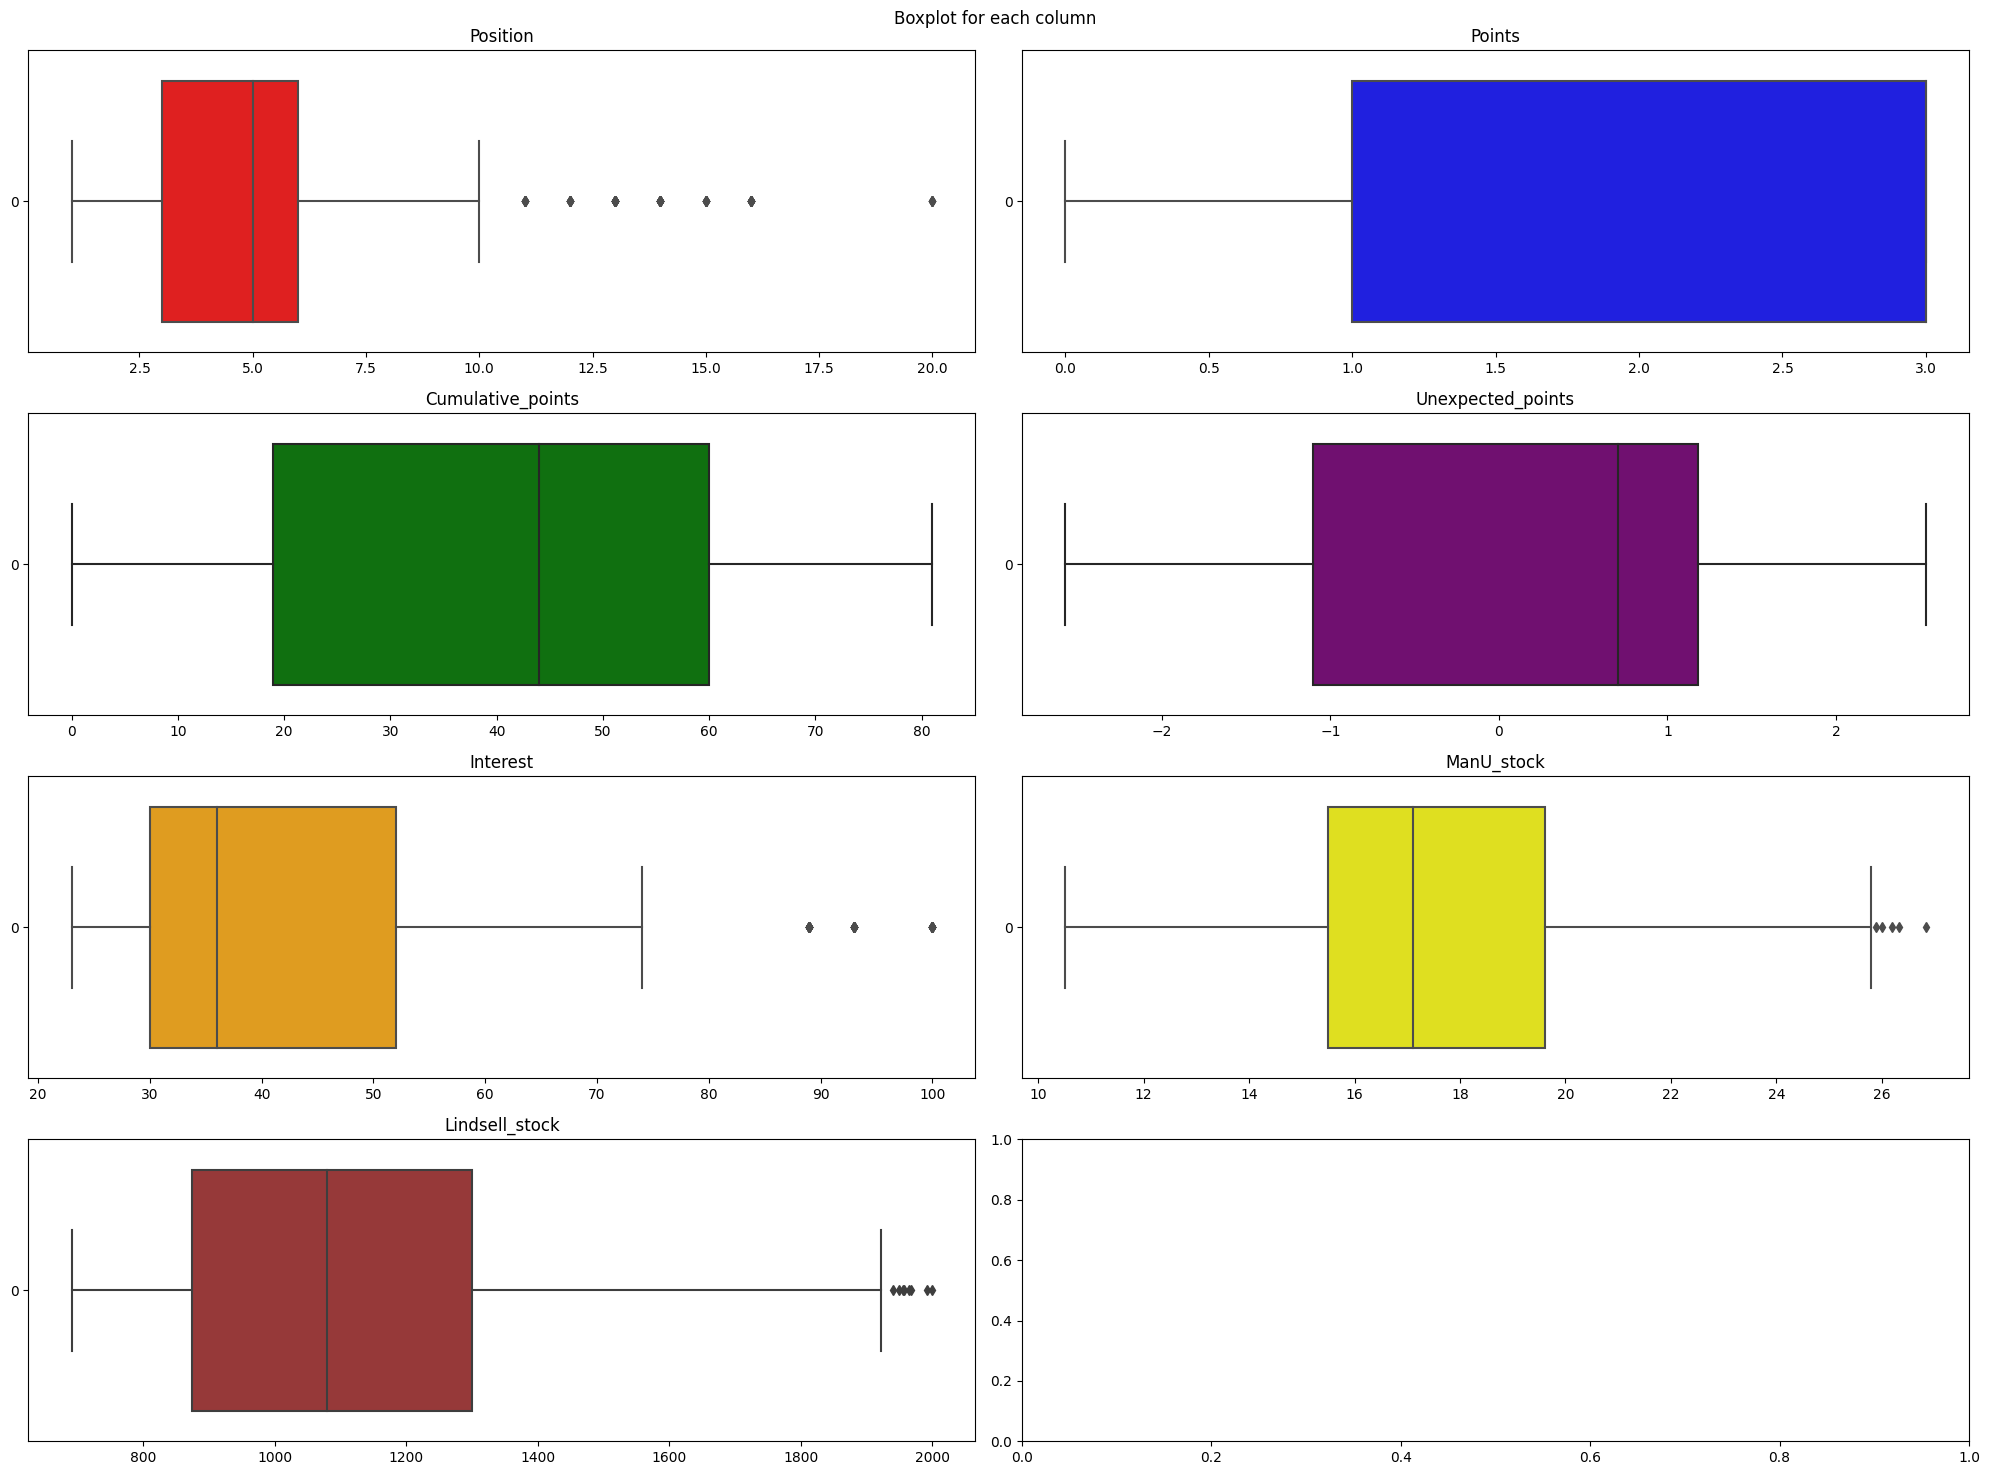

In [32]:
# Boxplot for each column
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
fig.suptitle('Boxplot for each column')

sns.boxplot(ax=axes[0, 0], data=data['Position'], orient='h', color='red')
axes[0, 0].set_title('Position')
sns.boxplot(ax=axes[0, 1], data=data['Points'], orient='h', color='blue')
axes[0, 1].set_title('Points')
sns.boxplot(ax=axes[1, 0], data=data['Cumulative_points'], orient='h', color='green')
axes[1, 0].set_title('Cumulative_points')
sns.boxplot(ax=axes[1, 1], data=data['Unexpected_points'], orient='h', color='purple')
axes[1, 1].set_title('Unexpected_points')
sns.boxplot(ax=axes[2, 0], data=data['Interest'], orient='h', color='orange')
axes[2, 0].set_title('Interest')
sns.boxplot(ax=axes[2, 1], data=data['ManU_stock'], orient='h', color='yellow')
axes[2, 1].set_title('ManU_stock')
sns.boxplot(ax=axes[3, 0], data=data['Lindsell_stock'], orient='h', color='brown')
axes[3, 0].set_title('Lindsell_stock')

plt.tight_layout()
plt.show()

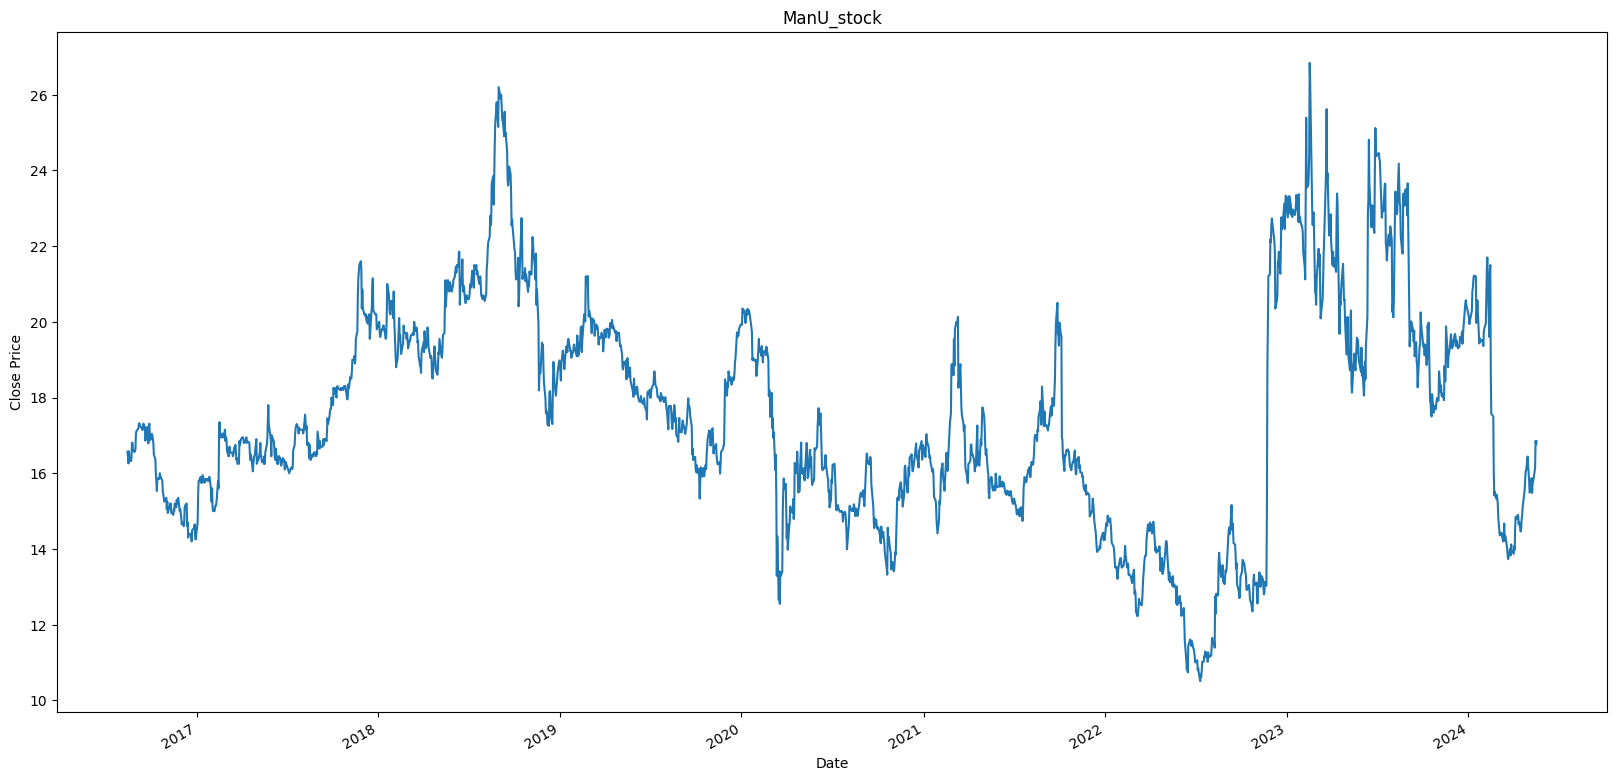

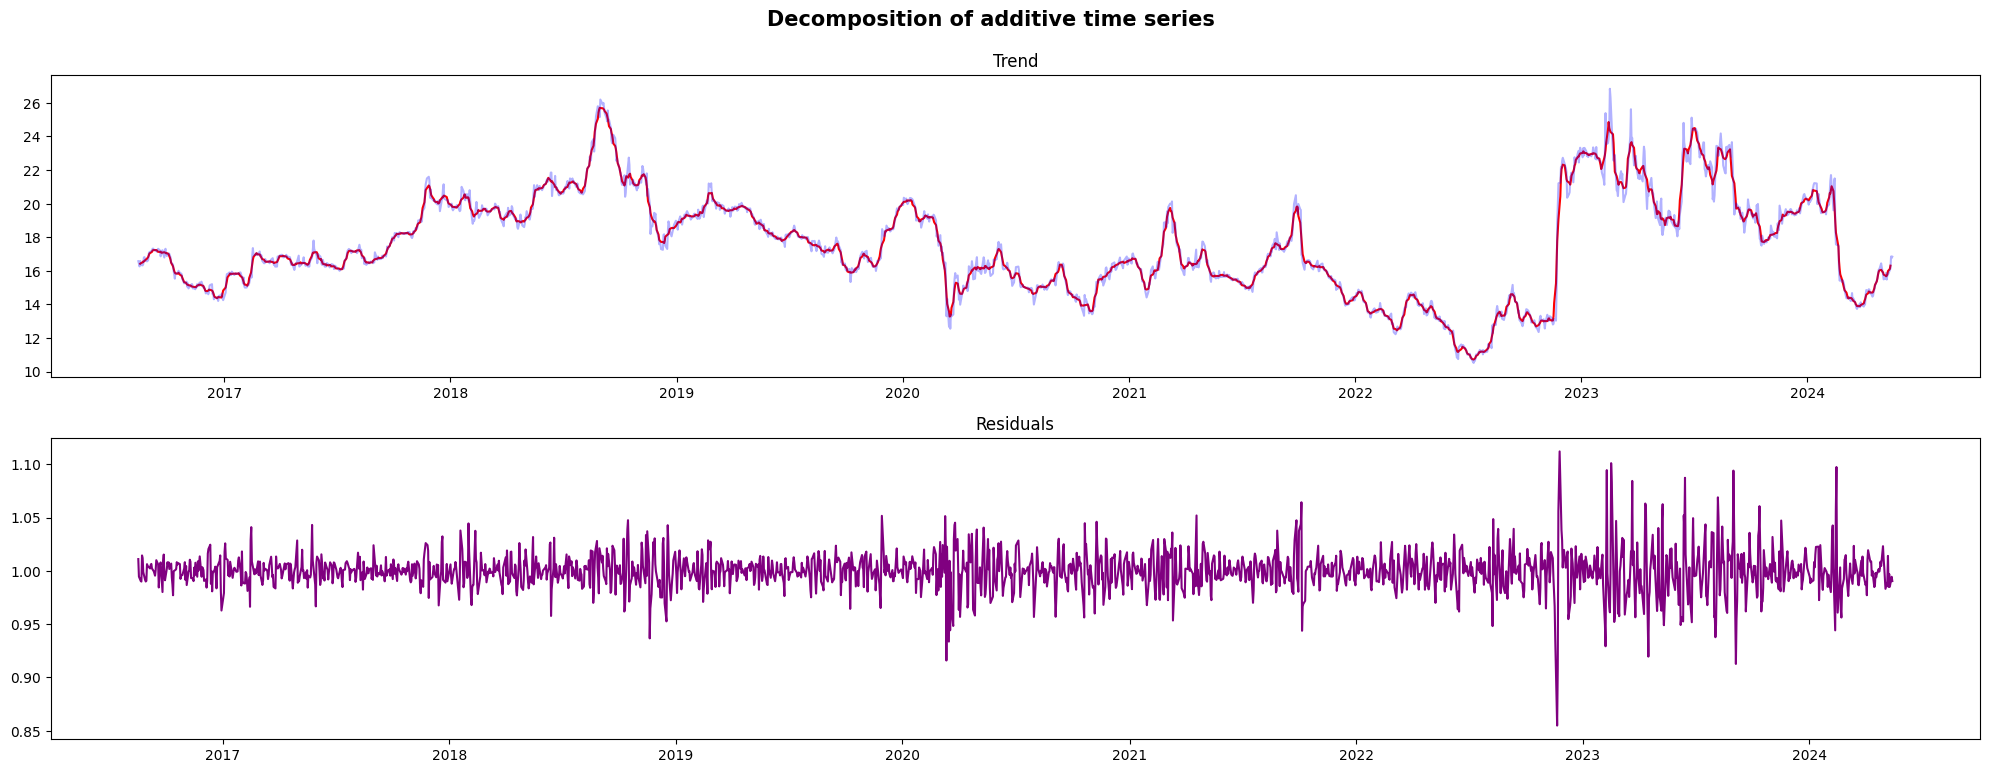

In [33]:
# time series plot of the stocks
data['ManU_stock'].plot(figsize=(20, 10), title='ManU_stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# trend, seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['ManU_stock'], model='multipactive', period=7)

# Extracting different components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the components
plt.figure(figsize=(20, 15))
plt.suptitle('Decomposition of additive time series \n', fontsize=15, fontweight='bold')
plt.subplot(411)
plt.plot(trend, color='r')
plt.plot(data['ManU_stock'], label='Original', color='b', alpha=0.3)
plt.title('Trend')
plt.subplot(412)
plt.plot(residual, color='purple')
plt.title('Residuals')
plt.tight_layout()
plt.show()


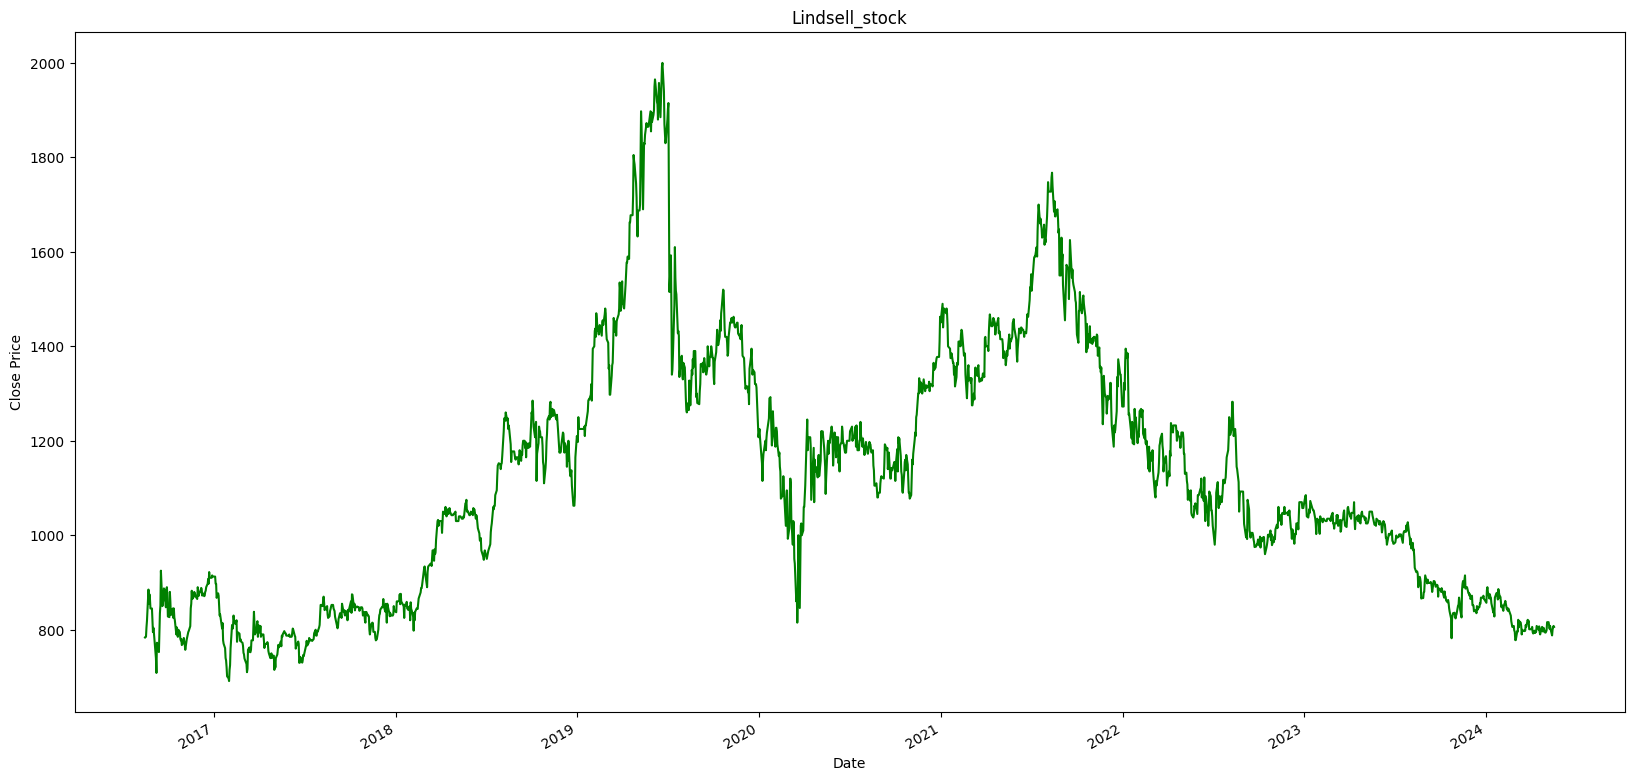

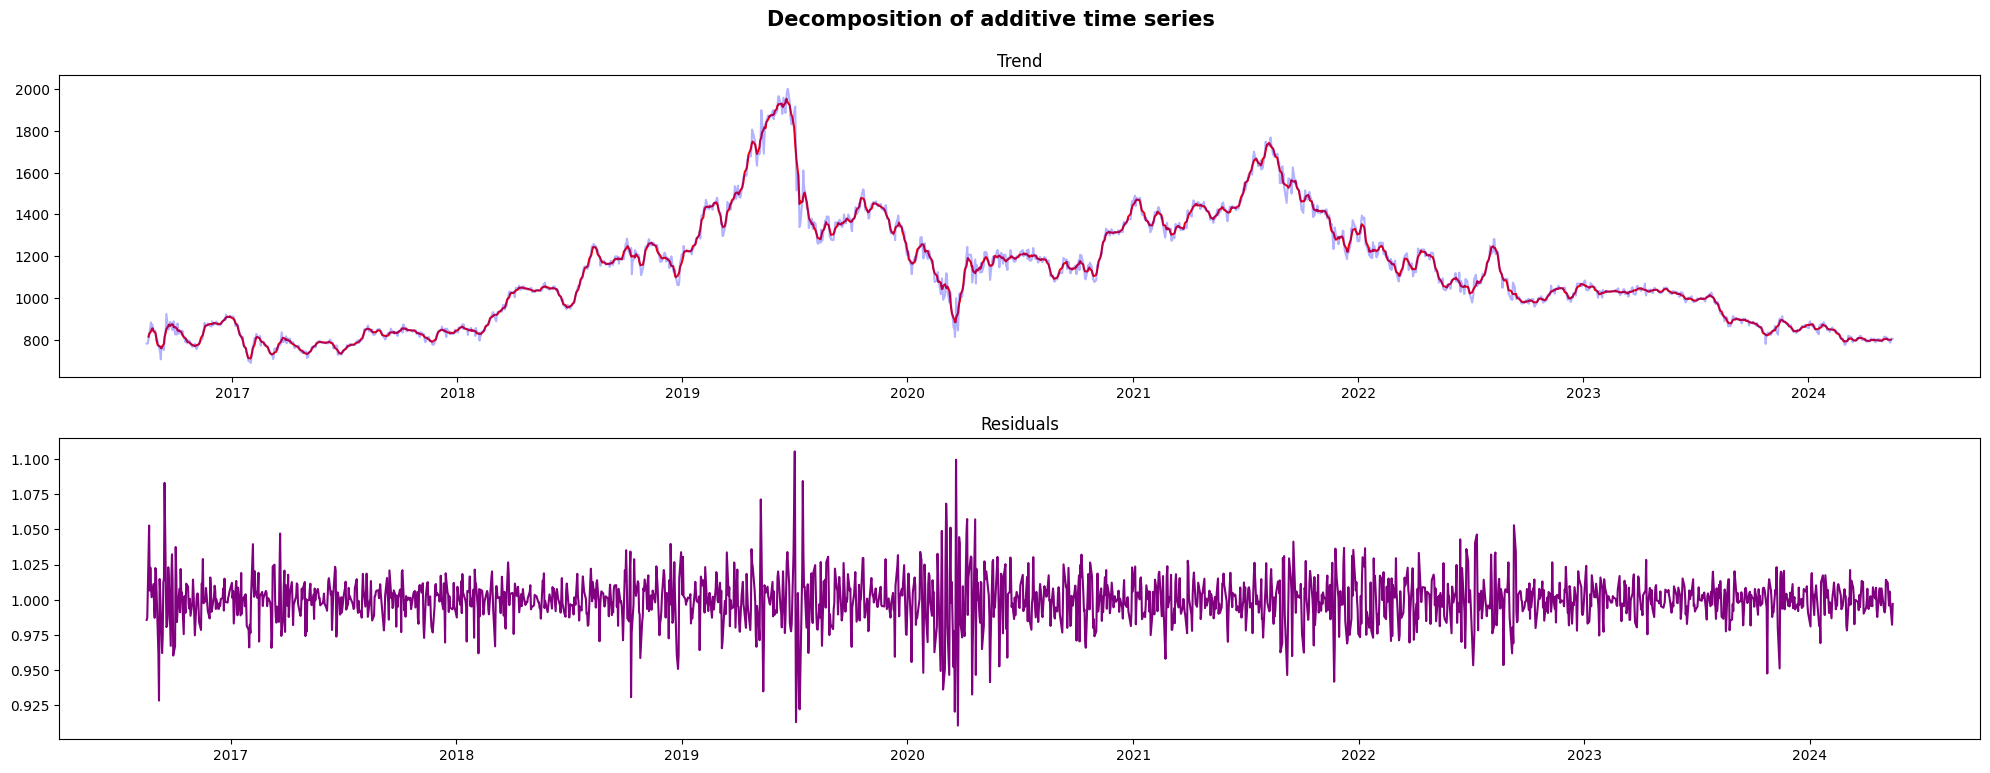

In [34]:
# time series plot of the stocks
data['Lindsell_stock'].plot(figsize=(20, 10), title='Lindsell_stock', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# trend, seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Lindsell_stock'], model='multipactive', period=7)

# Extracting different components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the components
plt.figure(figsize=(20, 15))
plt.suptitle('Decomposition of additive time series \n', fontsize=15, fontweight='bold')
plt.subplot(411)
plt.plot(trend, color='r')
plt.plot(data['Lindsell_stock'], label='Original', color='b', alpha=0.3)
plt.title('Trend')
plt.subplot(412)
plt.plot(residual, color='purple')
plt.title('Residuals')
plt.tight_layout()
plt.show()


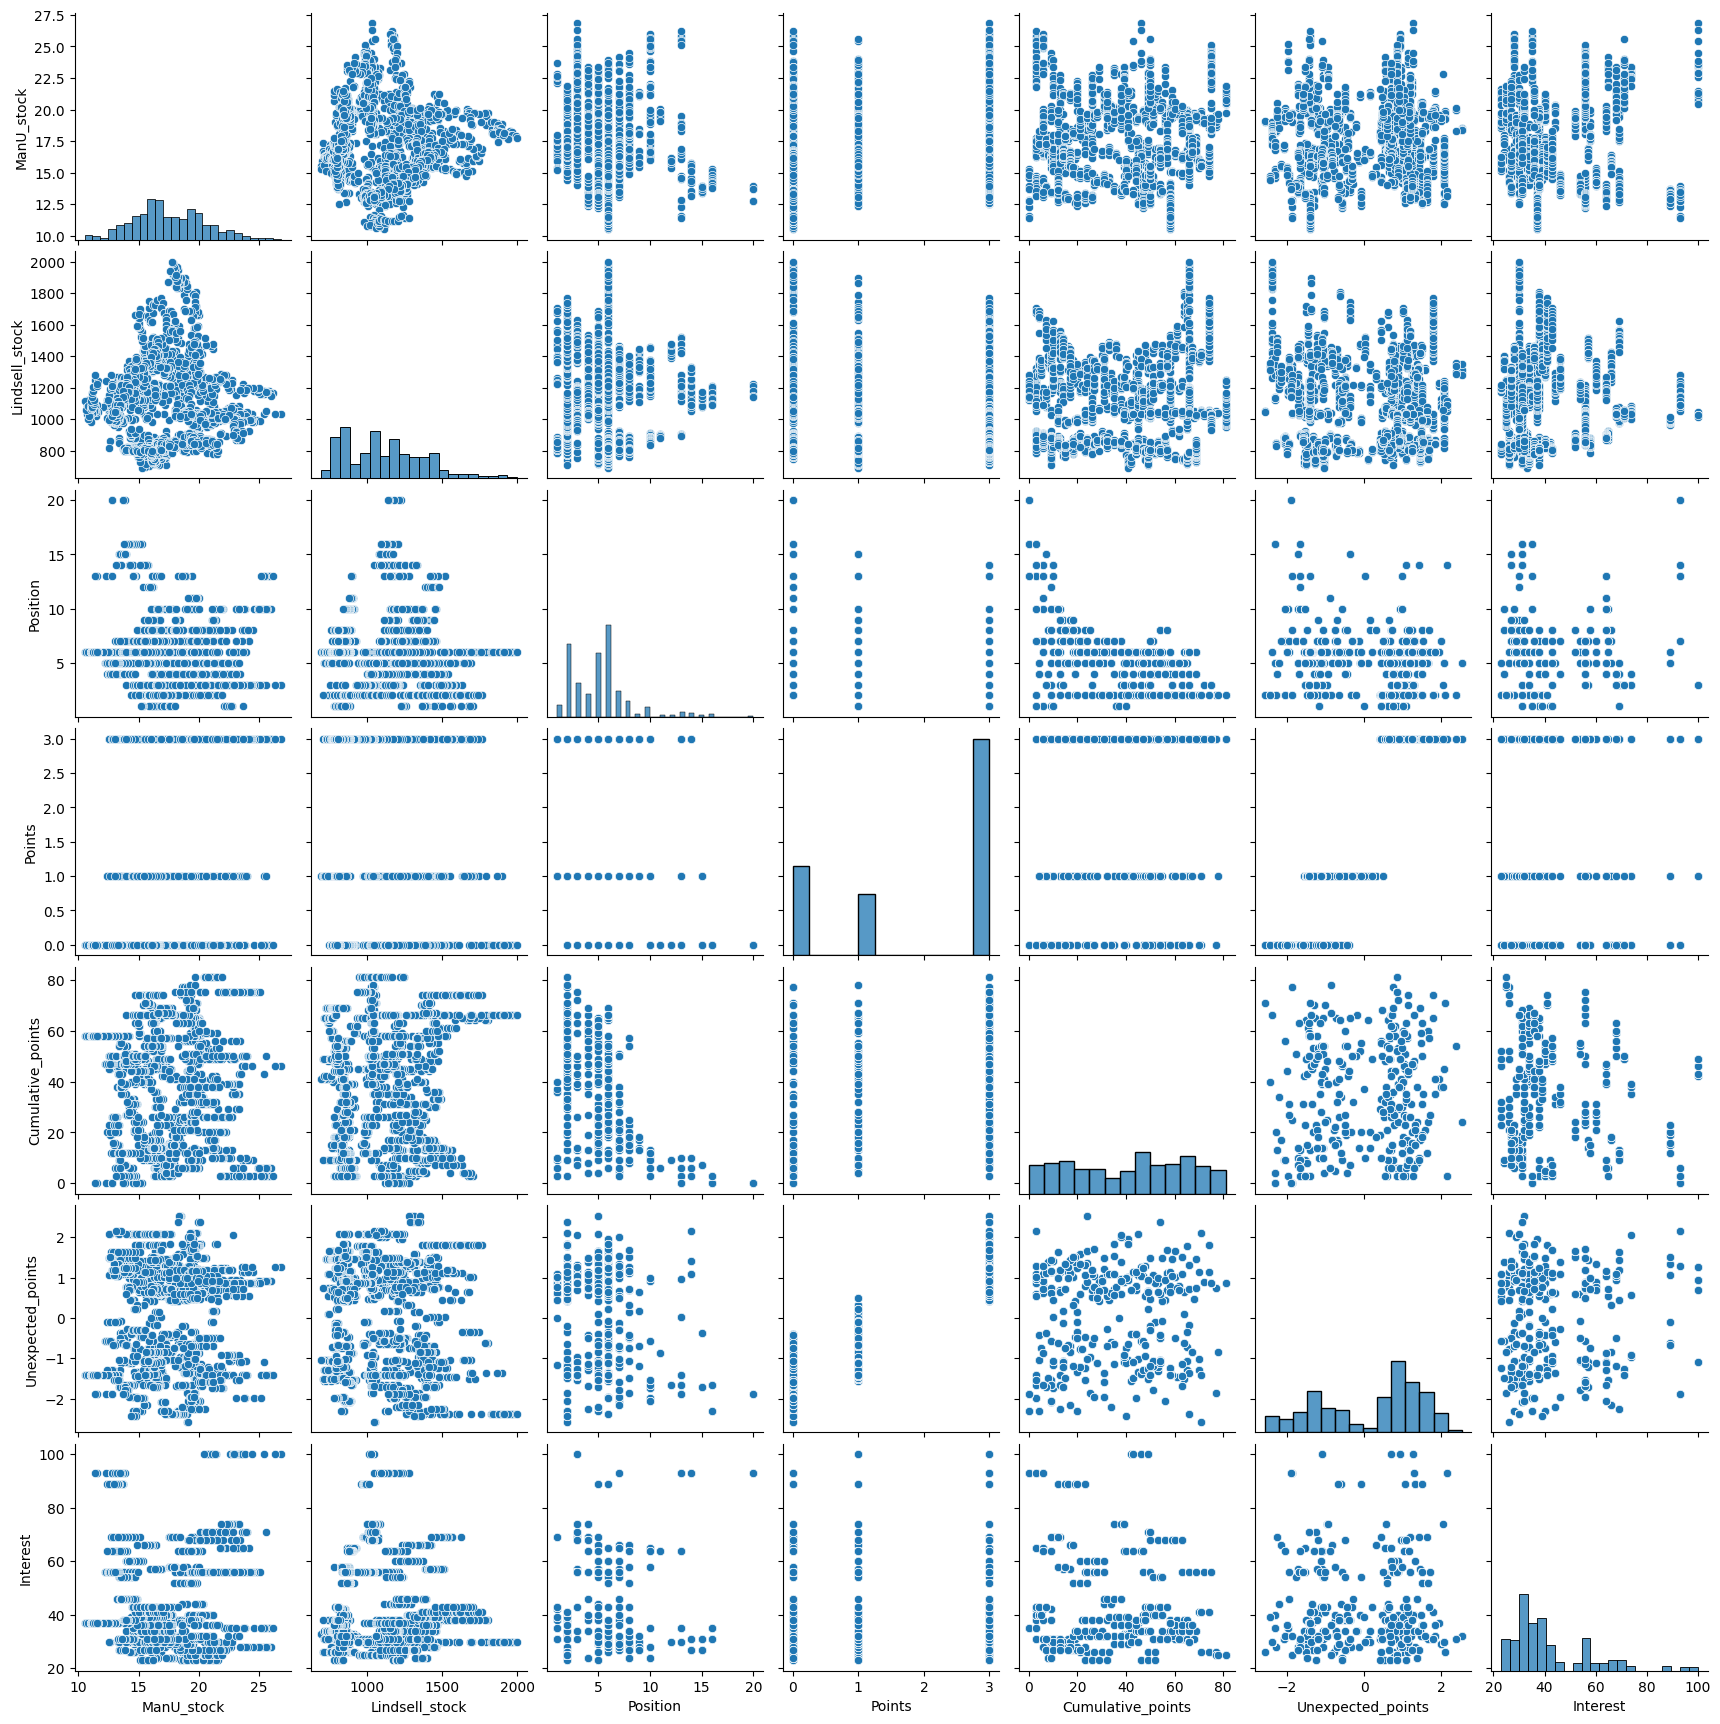

In [35]:
# pairplot
sns.pairplot(data)
plt.show()

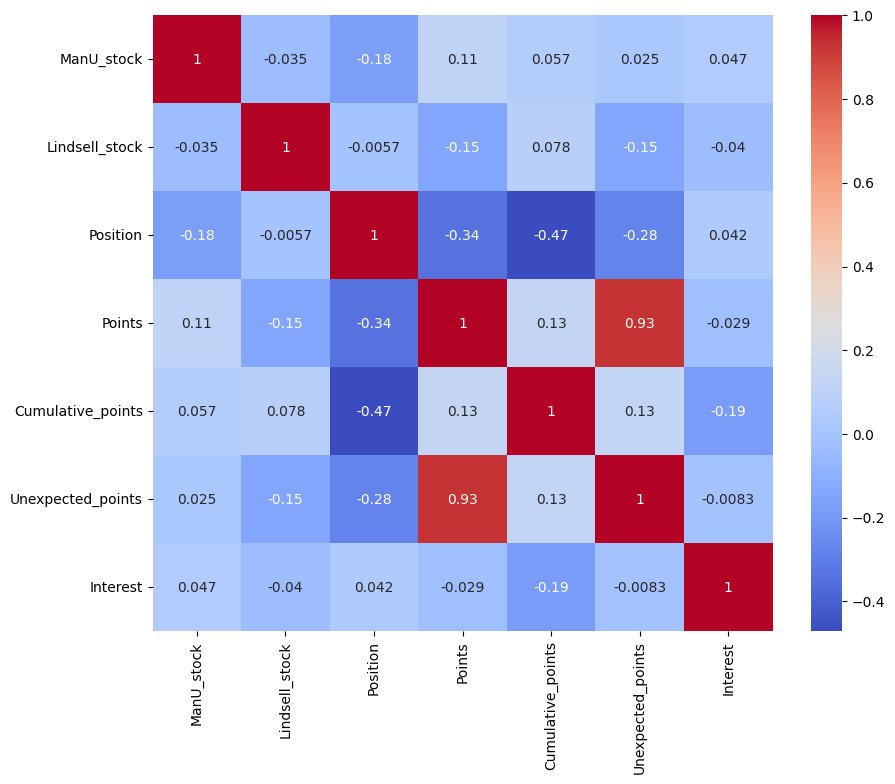

In [36]:
# correlation matrix
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [11]:
data.to_csv('cleaned_data.csv')